In [6]:
from IPython.core.display import display, HTML

import numpy as np
means = np.load("data/means.npy").astype(np.float32)
covs = np.load("data/covs.npy").astype(np.float32)
xicovs = np.load("data/xicovs.npy").astype(np.float32)
signals = np.load("data/signals.npy").astype(np.float32)
A = np.load("data/A.npy").astype(np.float32)
dt = np.load("data/dt.npy")[0]
C = np.load("data/C.npy").astype(np.float32)
D = np.load("data/D.npy").astype(np.float32)

coeffs = [C, A, D , dt]



from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from misc import *
import tensorflow as tf
%load_ext autoreload
%autoreload 2

tfsignals = tf.convert_to_tensor(signals)
tfxicovs = tf.convert_to_tensor(xicovs)[:-1]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/cooper-cooper/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


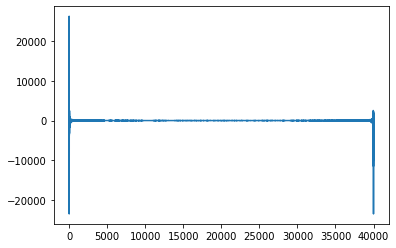

In [36]:
plt.plot(np.fft.fft(means[:,0])[:-1])

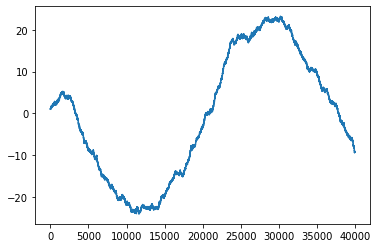

In [27]:
plt.plot(means[:,0])

In [10]:
batched_signals = tf.stack(tf.split(tfsignals, 10)) 
batched_xicovs  = tf.stack(tf.split(tfxicovs, 10))

inputs = (batched_xicovs, batched_signals)

In [13]:
from RNN_models import *

model = RecModel(coeffs, batch_size=len(batched_signals))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1))

In [14]:

model.fit(x=inputs, y=batched_signals, epochs=100, batch_size=model.batch_size)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0798e-04
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0777e-04
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0757e-04
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0742e-04
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0731e-04
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0724e-04
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0719e-04
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0713e-04
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0706e-04
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0699e-04
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0692e-04
Epoch 12/100
1/1 [============

In [15]:
model.trainable_variables

[<tf.Variable 'rec_model_2/rnn_2/stacked_rnn_cells_2/minimal_rnn_cell_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.18228291,  1.03283   ],
        [-0.18485638,  0.22689015]], dtype=float32)>,
 <tf.Variable 'rec_model_2/rnn_2/stacked_rnn_cells_2/minimal_rnn_cell_2/recurrent_kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.03888273,  0.03934595],
        [ 0.00317538, -0.04744083]], dtype=float32)>]

In [16]:
series = ( tfxicovs[tf.newaxis,:,:,:], tfsignals[tf.newaxis,:,:] )

In [17]:
model.batch_size=1

In [18]:
predictions = model.rec_layer(series, initial_state=model.initial_state)

In [19]:
tfmeans = tf.convert_to_tensor(means.astype(np.float32))
Cxdt=tf.einsum('ij,kj->ki',model.C, tfmeans)*model.dt

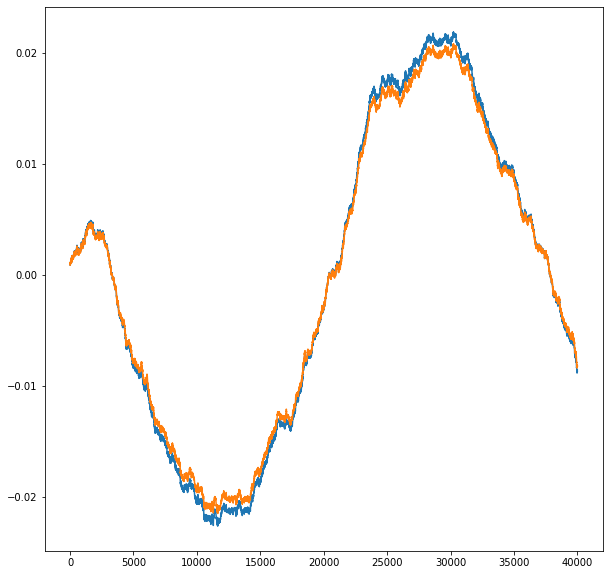

In [22]:
plt.figure(figsize=(10,10))

plt.plot(predictions[0][:,0])
plt.plot(Cxdt[:,0])#[:10000])